<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/cap_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
earthquake = pd.read_csv('/content/all_month.csv')
earthquake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-06-23T02:43:55.360Z,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,...,2024-06-23T02:45:57.808Z,"20 km NE of Warner Springs, CA",earthquake,0.90,1.71,0.205,7.0,automatic,ci,ci
1,2024-06-23T02:36:14.460Z,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,...,2024-06-23T02:37:51.798Z,"7 km WNW of Cobb, CA",earthquake,0.20,0.38,0.180,27.0,automatic,nc,nc
2,2024-06-23T02:28:48.780Z,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,...,2024-06-23T02:30:27.436Z,"12 km NW of The Geysers, CA",earthquake,0.71,1.08,0.170,8.0,automatic,nc,nc
3,2024-06-23T02:28:34.590Z,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,...,2024-06-23T02:30:14.310Z,"6 km SSW of Volcano, Hawaii",earthquake,0.15,0.20,0.250,13.0,automatic,hv,hv
4,2024-06-23T02:23:14.910Z,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,...,2024-06-23T02:24:50.430Z,"1 km W of The Geysers, CA",earthquake,0.30,0.49,0.270,10.0,automatic,nc,nc


In [3]:
earthquake.shape

(10037, 22)

In [4]:
earthquake['mag'].unique()

array([ 1.03      ,  1.28      ,  0.27      ,  1.88999999,  1.02      ,
        1.48      ,  1.87      ,  1.6       ,  1.26      ,  1.16      ,
        0.77      ,  1.49      ,  2.3       ,  1.14      ,  1.578704  ,
        0.29      ,  2.36999989,  1.74000001,  1.3       ,  1.        ,
        2.35      ,  1.7       ,  0.79      ,  1.1       ,  1.35      ,
        2.46      ,  1.84000003,  1.83000004,  0.7       ,  1.8       ,
        0.75      ,  2.6       ,  1.59      ,  1.5       ,  2.24      ,
       -0.1       ,  0.8       ,  1.72000003,  0.95      ,  3.1       ,
        5.1       ,  0.44      ,  0.76      ,  3.88      ,  0.63      ,
        2.26      ,  0.09      ,  1.2       ,  2.27      ,  0.62      ,
        1.78      ,  2.02999997,  0.66      ,  1.81      ,  1.76      ,
        2.41      ,  1.55      ,  2.33      ,  0.82      ,  4.4       ,
        1.08      ,  4.3       ,  1.24      ,  0.15      ,  0.07      ,
        1.4       ,  1.56      ,  4.6       ,  2.1       ,  1.85

In [5]:
earthquake['type'].unique()

array(['earthquake', 'quarry blast', 'explosion', 'other event',
       'ice quake'], dtype=object)

In [6]:
earthquake.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

**DATA CLEANING**

In [7]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10037 non-null  object 
 1   latitude         10037 non-null  float64
 2   longitude        10037 non-null  float64
 3   depth            10037 non-null  float64
 4   mag              10037 non-null  float64
 5   magType          10037 non-null  object 
 6   nst              8568 non-null   float64
 7   gap              8568 non-null   float64
 8   dmin             8555 non-null   float64
 9   rms              10037 non-null  float64
 10  net              10037 non-null  object 
 11  id               10037 non-null  object 
 12  updated          10037 non-null  object 
 13  place            10037 non-null  object 
 14  type             10037 non-null  object 
 15  horizontalError  7886 non-null   float64
 16  depthError       10037 non-null  float64
 17  magError    

In [8]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1469
gap                1469
dmin               1482
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2151
depthError            0
magError           1512
magNst             1469
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
missing_percent = earthquake.isnull().mean()*100
missing_percent

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                14.635847
gap                14.635847
dmin               14.765368
rms                 0.000000
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalError    21.430706
depthError          0.000000
magError           15.064262
magNst             14.635847
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [10]:
import missingno as msno

<Axes: >

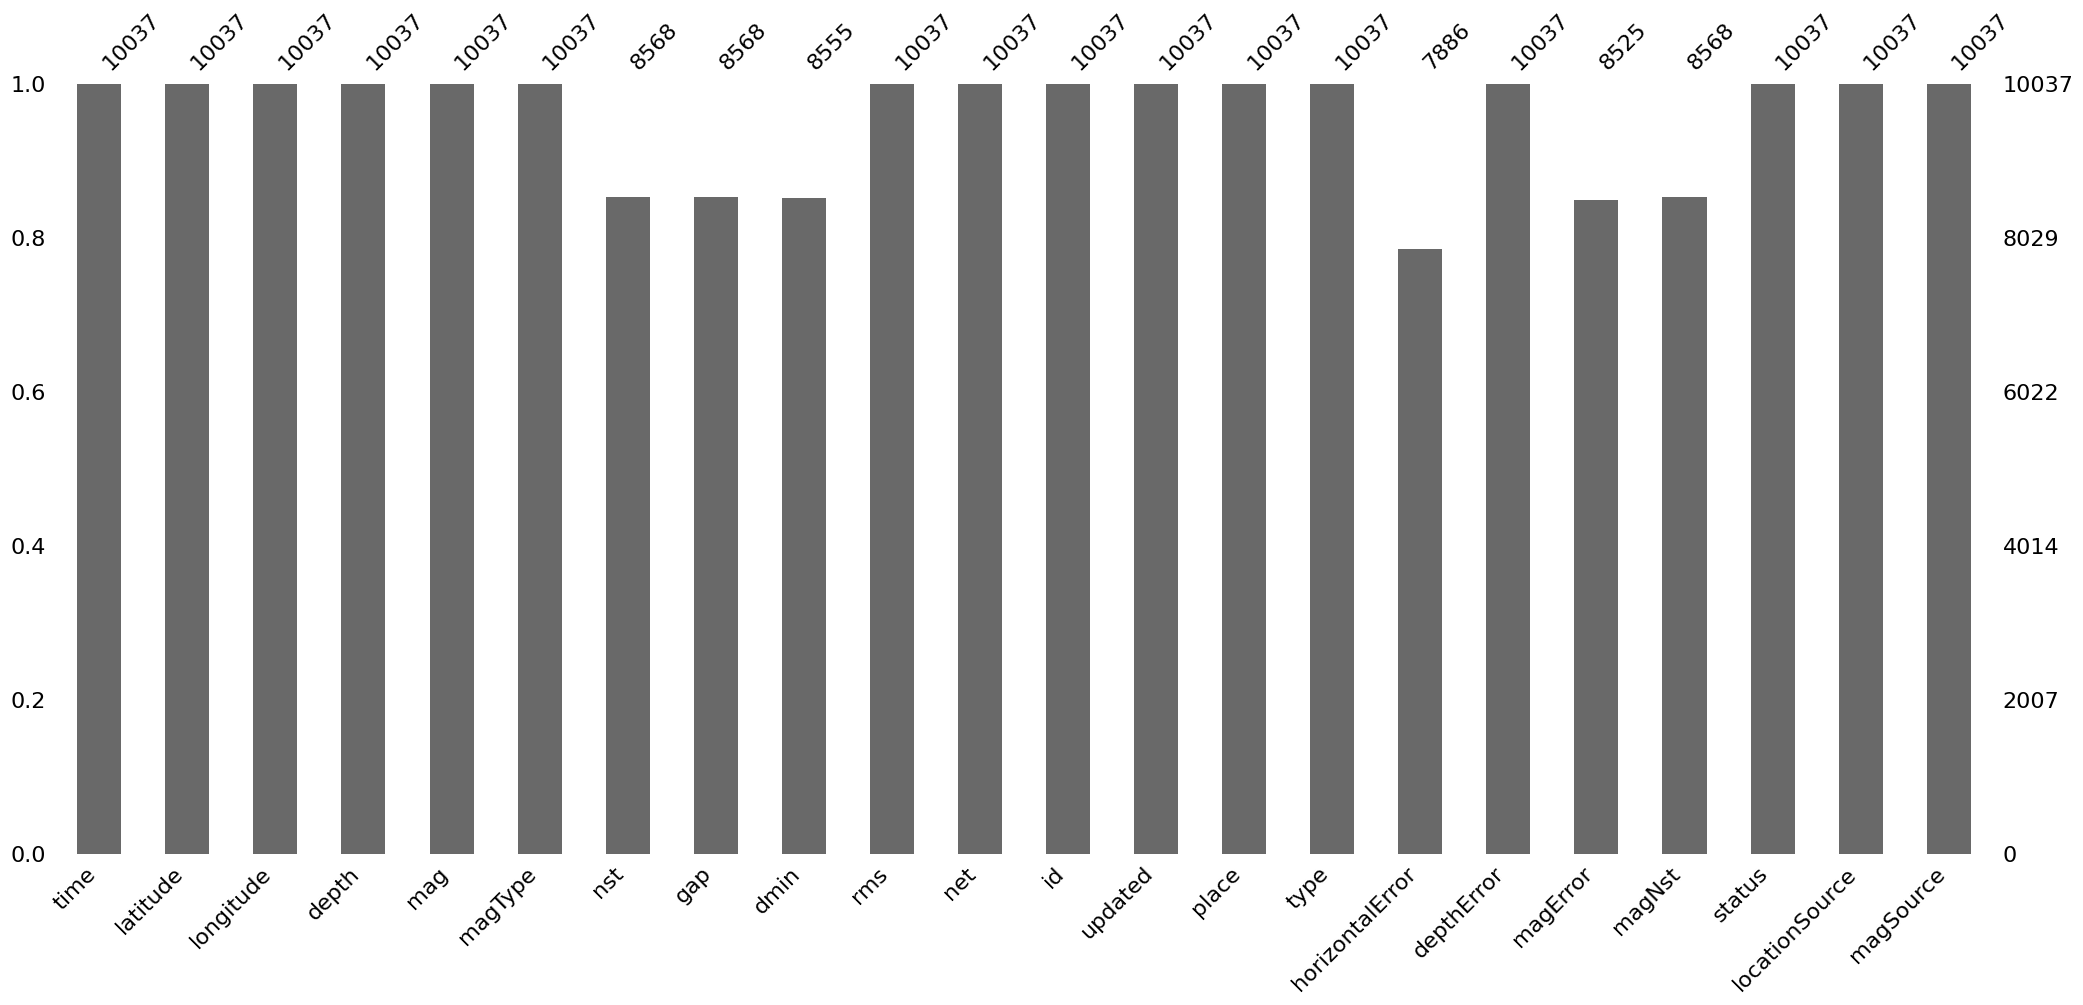

In [11]:
msno.bar(earthquake)

<Axes: >

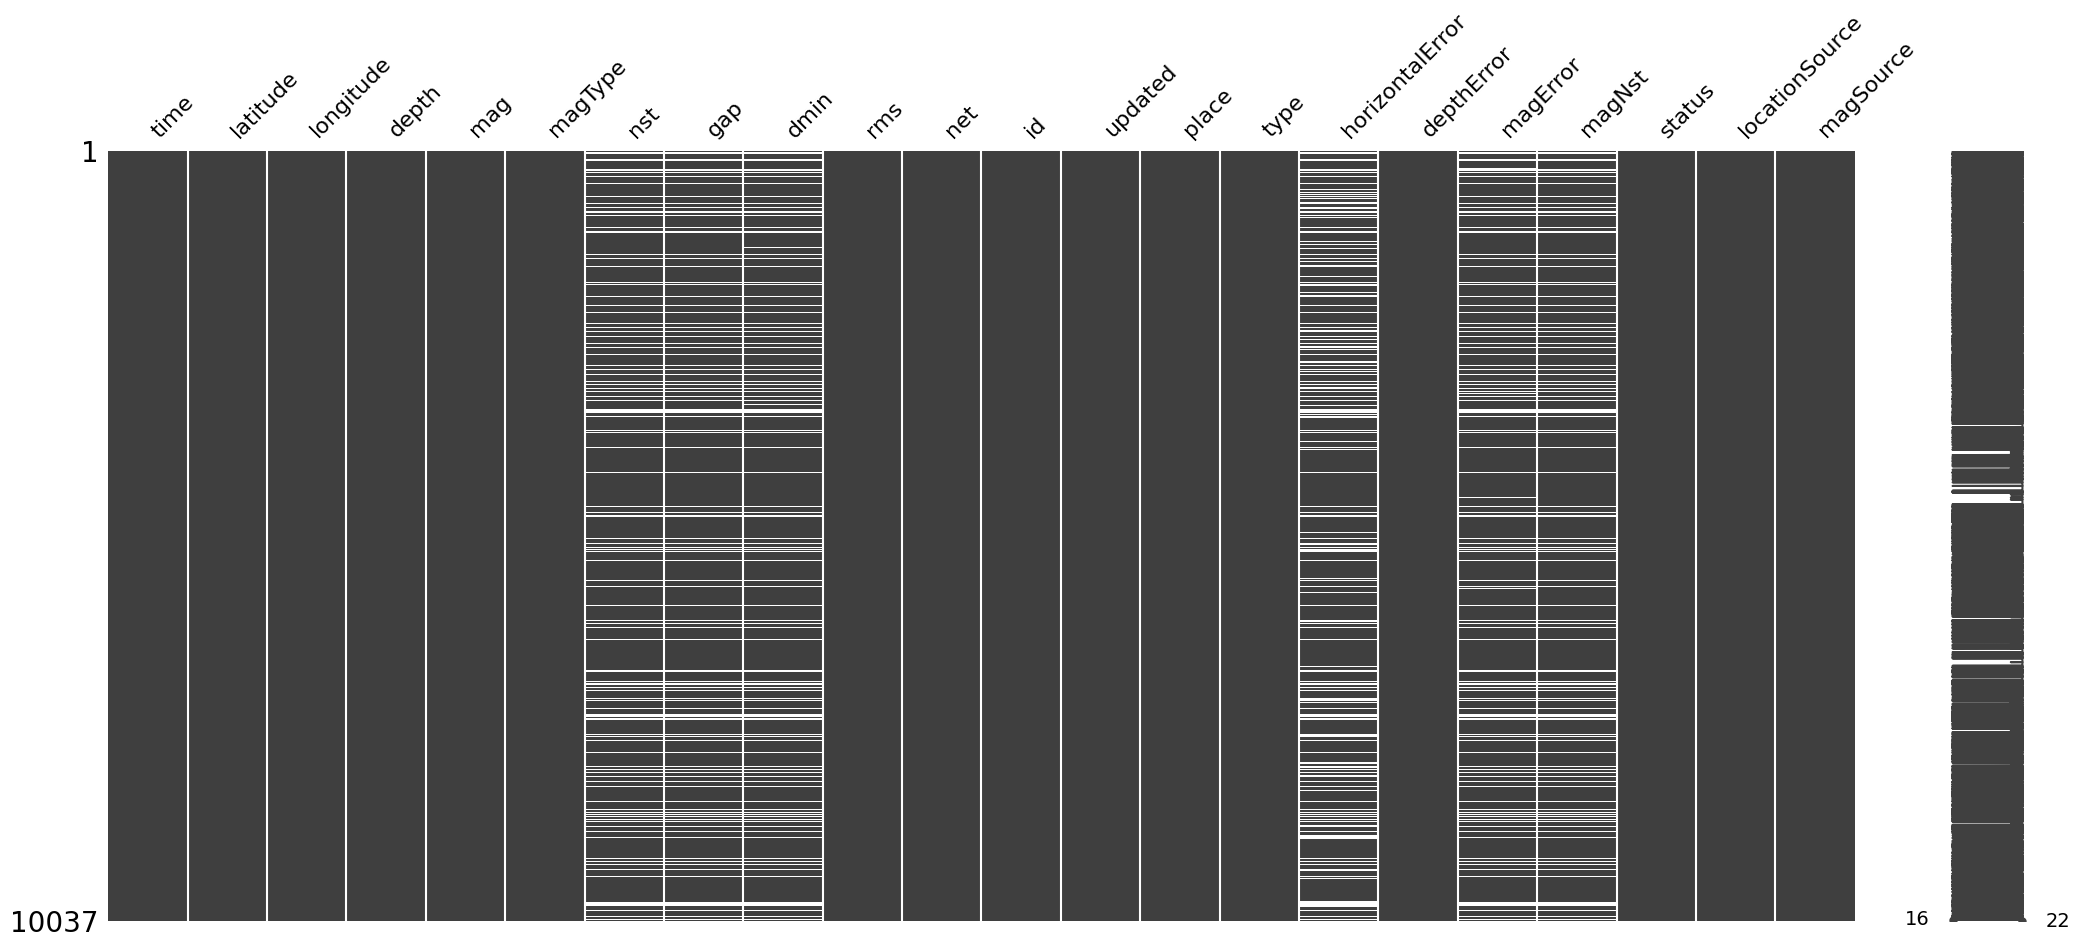

In [12]:
msno.matrix(earthquake)

<Axes: >

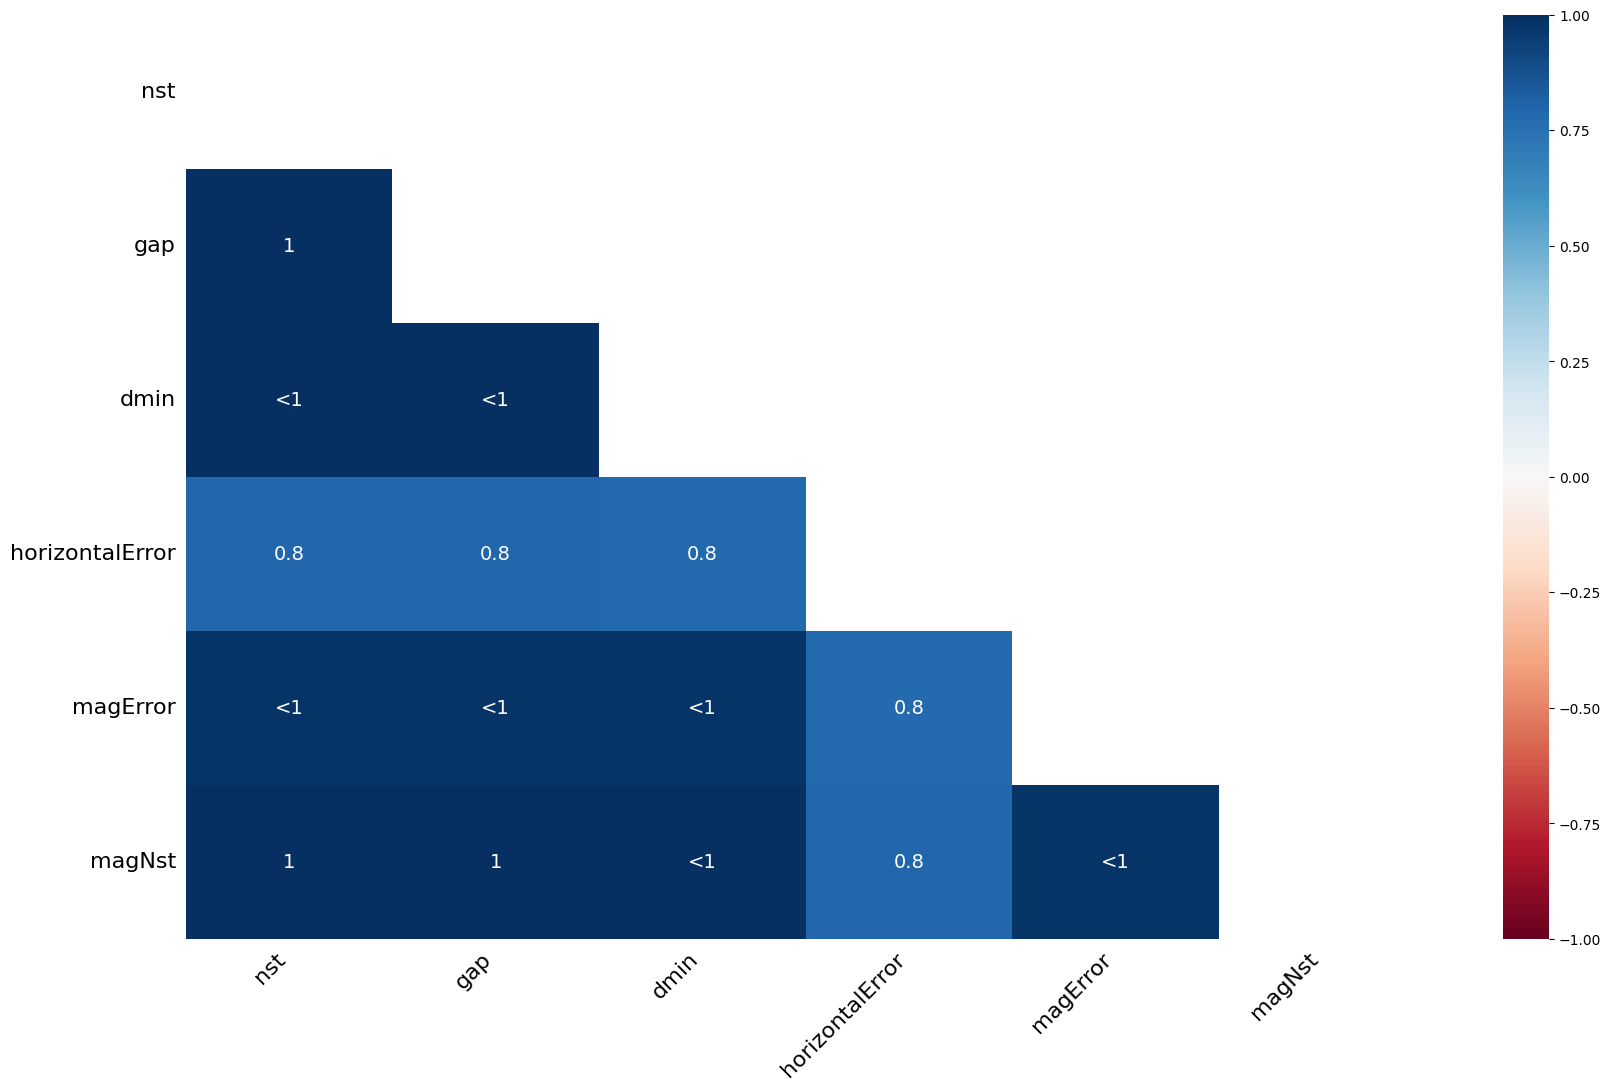

In [13]:
msno.heatmap(earthquake)

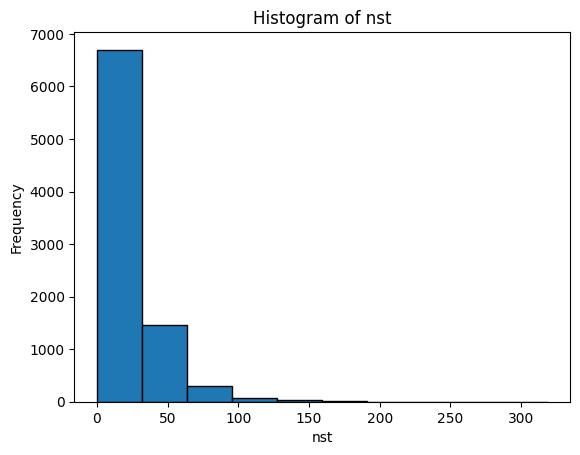

In [14]:
plt.hist(earthquake['nst'], bins=10, edgecolor='black')
plt.xlabel('nst')
plt.ylabel('Frequency')
plt.title('Histogram of nst')
plt.show()

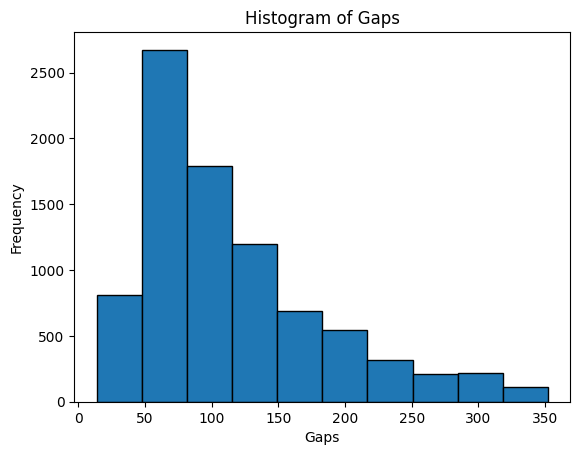

In [15]:
plt.hist(earthquake['gap'], bins=10, edgecolor='black')
plt.xlabel('Gaps')
plt.ylabel('Frequency')
plt.title('Histogram of Gaps')
plt.show()

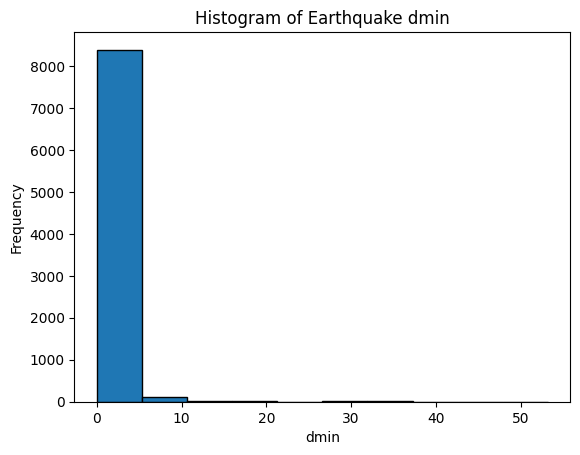

In [16]:
plt.hist(earthquake['dmin'], bins=10, edgecolor='black')
plt.xlabel('dmin')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake dmin')
plt.show()

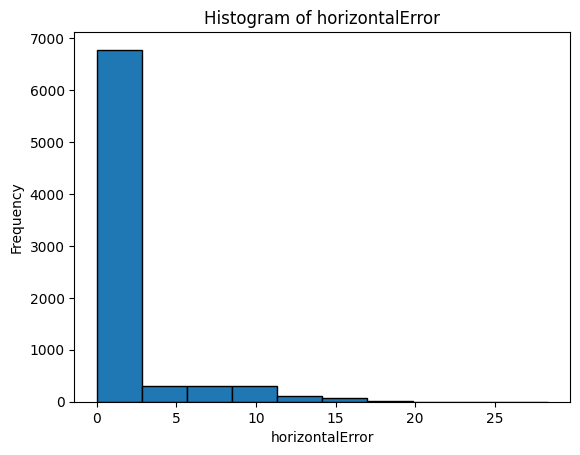

In [17]:
plt.hist(earthquake['horizontalError'], bins=10, edgecolor='black')
plt.xlabel('horizontalError')
plt.ylabel('Frequency')
plt.title('Histogram of horizontalError')
plt.show()

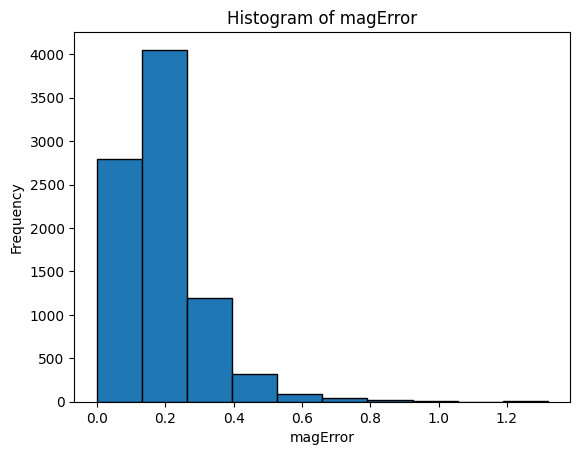

In [18]:
plt.hist(earthquake['magError'], bins=10, edgecolor='black')
plt.xlabel('magError')
plt.ylabel('Frequency')
plt.title('Histogram of magError')
plt.show()

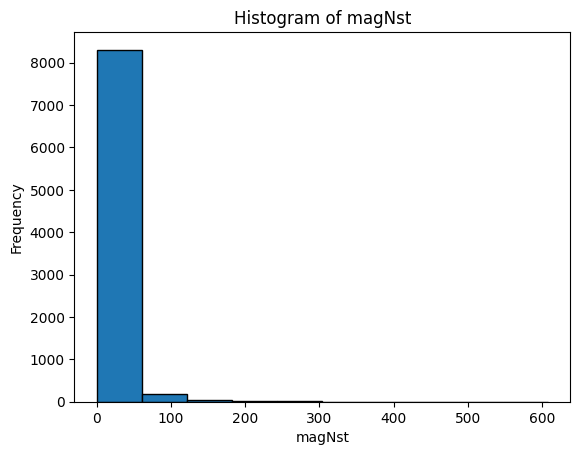

In [19]:
plt.hist(earthquake['magNst'], bins=10, edgecolor='black')
plt.xlabel('magNst')
plt.ylabel('Frequency')
plt.title('Histogram of magNst')
plt.show()

In [20]:
from sklearn.impute import SimpleImputer
impute_columns = ['nst', 'dmin', 'horizontalError', 'magNst']
imputer = SimpleImputer(strategy = 'median')
earthquake[impute_columns] = imputer.fit_transform(earthquake[impute_columns])

In [21]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                   0
gap                1469
dmin                  0
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError           1512
magNst                0
status                0
locationSource        0
magSource             0
dtype: int64

In [22]:
columns = ['gap', 'magError']
imputer = SimpleImputer(strategy = 'mean')
earthquake[columns] = imputer.fit_transform(earthquake[columns])

In [23]:
#Converting time and updated columns to datetime
earthquake['time'] = pd.to_datetime(earthquake['time'])
earthquake['updated'] = pd.to_datetime(earthquake['updated'])

In [24]:
#Extracting date and time separately
earthquake['time_date'] = earthquake['time'].dt.date
earthquake['time_time'] = earthquake['time'].dt.time

earthquake['updated_date'] = earthquake['updated'].dt.date
earthquake['updated_time'] = earthquake['updated'].dt.time

#Calculating the duration
earthquake['duration'] = earthquake['updated'] - earthquake['time']

In [25]:
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError,magNst,status,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,0.205000,7.0,automatic,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000
1,2024-06-23 02:36:14.460000+00:00,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,0.180000,27.0,automatic,nc,nc,2024-06-23,02:36:14.460000,2024-06-23,02:37:51.798000,0 days 00:01:37.338000
2,2024-06-23 02:28:48.780000+00:00,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,0.170000,8.0,automatic,nc,nc,2024-06-23,02:28:48.780000,2024-06-23,02:30:27.436000,0 days 00:01:38.656000
3,2024-06-23 02:28:34.590000+00:00,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,0.250000,13.0,automatic,hv,hv,2024-06-23,02:28:34.590000,2024-06-23,02:30:14.310000,0 days 00:01:39.720000
4,2024-06-23 02:23:14.910000+00:00,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,0.270000,10.0,automatic,nc,nc,2024-06-23,02:23:14.910000,2024-06-23,02:24:50.430000,0 days 00:01:35.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,0.159675,7.0,reviewed,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,0.150000,12.0,automatic,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,0.130000,9.0,automatic,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,0.200000,15.0,reviewed,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000


In [26]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             10037 non-null  datetime64[ns, UTC]
 1   latitude         10037 non-null  float64            
 2   longitude        10037 non-null  float64            
 3   depth            10037 non-null  float64            
 4   mag              10037 non-null  float64            
 5   magType          10037 non-null  object             
 6   nst              10037 non-null  float64            
 7   gap              10037 non-null  float64            
 8   dmin             10037 non-null  float64            
 9   rms              10037 non-null  float64            
 10  net              10037 non-null  object             
 11  id               10037 non-null  object             
 12  updated          10037 non-null  datetime64[ns, UTC]
 13  place           

In [27]:
def process_duration(df, duration_col):
  df['duration_days'] = df[duration_col].dt.days
  df['duration_time'] = df[duration_col].dt.seconds

  #Converting time to minutes
  df['duration_hours'] = df['duration_time']/3600
  return df

process_duration(earthquake, 'duration')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_hours
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000,0,122,0.033889
1,2024-06-23 02:36:14.460000+00:00,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,nc,nc,2024-06-23,02:36:14.460000,2024-06-23,02:37:51.798000,0 days 00:01:37.338000,0,97,0.026944
2,2024-06-23 02:28:48.780000+00:00,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,nc,nc,2024-06-23,02:28:48.780000,2024-06-23,02:30:27.436000,0 days 00:01:38.656000,0,98,0.027222
3,2024-06-23 02:28:34.590000+00:00,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,hv,hv,2024-06-23,02:28:34.590000,2024-06-23,02:30:14.310000,0 days 00:01:39.720000,0,99,0.027500
4,2024-06-23 02:23:14.910000+00:00,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,nc,nc,2024-06-23,02:23:14.910000,2024-06-23,02:24:50.430000,0 days 00:01:35.520000,0,95,0.026389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,2.167500
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,0.027500
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,0.026944
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,11.913611


In [28]:
earthquake.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_hours
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,2.167500
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,0.027500
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,0.026944
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,11.913611
10036,2024-05-24 02:49:34.160000+00:00,38.814835,-122.824837,2.0100,1.07,md,16.0,58.0,0.006856,0.02,...,nc,nc,2024-05-24,02:49:34.160000,2024-05-24,02:51:09.581000,0 days 00:01:35.421000,0,95,0.026389


In [29]:
earthquake.head(1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_hours
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127,0.23,...,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000,0,122,0.033889


In [30]:
earthquake['actual_place'] = earthquake['place'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else x)
print(earthquake[['place', 'actual_place']])

                                place actual_place
0      20 km NE of Warner Springs, CA           CA
1                7 km WNW of Cobb, CA           CA
2         12 km NW of The Geysers, CA           CA
3         6 km SSW of Volcano, Hawaii       Hawaii
4           1 km W of The Geysers, CA           CA
...                               ...          ...
10032     85 km NNW of Karluk, Alaska       Alaska
10033      9 km NW of The Geysers, CA           CA
10034     8 km NNW of The Geysers, CA           CA
10035        30 km NW of Toyah, Texas        Texas
10036      7 km NW of The Geysers, CA           CA

[10037 rows x 2 columns]


In [31]:
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_hours,actual_place
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000,0,122,0.033889,CA
1,2024-06-23 02:36:14.460000+00:00,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,nc,2024-06-23,02:36:14.460000,2024-06-23,02:37:51.798000,0 days 00:01:37.338000,0,97,0.026944,CA
2,2024-06-23 02:28:48.780000+00:00,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,nc,2024-06-23,02:28:48.780000,2024-06-23,02:30:27.436000,0 days 00:01:38.656000,0,98,0.027222,CA
3,2024-06-23 02:28:34.590000+00:00,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,hv,2024-06-23,02:28:34.590000,2024-06-23,02:30:14.310000,0 days 00:01:39.720000,0,99,0.027500,Hawaii
4,2024-06-23 02:23:14.910000+00:00,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,nc,2024-06-23,02:23:14.910000,2024-06-23,02:24:50.430000,0 days 00:01:35.520000,0,95,0.026389,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,2.167500,Alaska
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,0.027500,CA
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,0.026944,CA
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,11.913611,Texas


In [32]:
columns_to_drop = ['place', 'id', 'time', 'time_date', 'time_time', 'updated_time', 'duration', 'duration_days']
earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
earthquake['duration_time'].unique()

array([  122,    97,    98, ...,  7188,  7803, 42889], dtype=int32)

In [34]:
earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,duration_time,duration_hours
count,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000
mean,37.748876,-109.803759,20.514962,1.532087,21.999801,115.491135,0.430366,0.260827,1.384203,3.069083,0.192789,15.453622,25208.561423,7.002378
std,18.882656,73.657731,53.832264,1.236795,19.869753,63.639181,2.084155,0.273966,2.727608,78.588719,0.110137,23.618918,27882.550270,7.745153
min,-64.011900,-179.965700,-6.300000,-1.470000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.001389
25%,32.903500,-151.347800,2.480000,0.760000,10.000000,69.000000,0.013070,0.090000,0.300000,0.450000,0.125000,6.000000,158.000000,0.043889
50%,38.534167,-122.709833,6.880000,1.300000,17.000000,109.000000,0.043540,0.160000,0.443929,0.750000,0.192610,10.000000,13438.000000,3.732778
75%,51.830700,-115.121200,13.830000,1.970000,26.000000,137.000000,0.099880,0.320000,0.778589,1.600000,0.223000,16.000000,47183.000000,13.106389
max,82.905800,179.996500,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,7836.900000,1.320000,608.000000,86398.000000,23.999444


Savint the cleaned dataframe

In [35]:
earthquake.to_csv('cleaned_earthquake.csv',index=False)

EXPLORATORY

In [36]:
cleaned_earthquake = pd.read_csv('/content/cleaned_earthquake.csv')
cleaned_earthquake.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,depthError,magError,magNst,status,locationSource,magSource,updated_date,duration_time,duration_hours,actual_place
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,...,1.71,0.205,7.0,automatic,ci,ci,2024-06-23,122,0.033889,CA
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,...,0.38,0.180,27.0,automatic,nc,nc,2024-06-23,97,0.026944,CA
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,...,1.08,0.170,8.0,automatic,nc,nc,2024-06-23,98,0.027222,CA
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,...,0.20,0.250,13.0,automatic,hv,hv,2024-06-23,99,0.027500,Hawaii
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,...,0.49,0.270,10.0,automatic,nc,nc,2024-06-23,95,0.026389,CA


In [37]:
cleaned_earthquake.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'updated', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'status', 'locationSource',
       'magSource', 'updated_date', 'duration_time', 'duration_hours',
       'actual_place'],
      dtype='object')

In [38]:
cleaned_earthquake['locationSource'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [39]:
cleaned_earthquake['magSource'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [40]:
cleaned_earthquake['net'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [41]:
columns_to_drop = ['magSource', 'locationSource']
cleaned_earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [42]:
cleaned_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         10037 non-null  float64
 1   longitude        10037 non-null  float64
 2   depth            10037 non-null  float64
 3   mag              10037 non-null  float64
 4   magType          10037 non-null  object 
 5   nst              10037 non-null  float64
 6   gap              10037 non-null  float64
 7   dmin             10037 non-null  float64
 8   rms              10037 non-null  float64
 9   net              10037 non-null  object 
 10  updated          10037 non-null  object 
 11  type             10037 non-null  object 
 12  horizontalError  10037 non-null  float64
 13  depthError       10037 non-null  float64
 14  magError         10037 non-null  float64
 15  magNst           10037 non-null  float64
 16  status           10037 non-null  object 
 17  updated_date

In [43]:
cleaned_earthquake['magType'].unique()

array(['ml', 'md', 'mb', 'mwr', 'mw', 'mww', 'mb_lg', 'mh', 'mlr'],
      dtype=object)

In [44]:
cleaned_earthquake['type'].value_counts()

type
earthquake      9863
quarry blast     111
explosion         57
other event        4
ice quake          2
Name: count, dtype: int64

In [45]:
columns_to_drop = ['updated']
cleaned_earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [46]:
cleaned_earthquake['updated_date'] = pd.to_datetime(cleaned_earthquake['updated_date'])

In [47]:
cleaned_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         10037 non-null  float64       
 1   longitude        10037 non-null  float64       
 2   depth            10037 non-null  float64       
 3   mag              10037 non-null  float64       
 4   magType          10037 non-null  object        
 5   nst              10037 non-null  float64       
 6   gap              10037 non-null  float64       
 7   dmin             10037 non-null  float64       
 8   rms              10037 non-null  float64       
 9   net              10037 non-null  object        
 10  type             10037 non-null  object        
 11  horizontalError  10037 non-null  float64       
 12  depthError       10037 non-null  float64       
 13  magError         10037 non-null  float64       
 14  magNst           10037 non-null  float

EXPLORATORY DATA ANALYSIS

In [48]:
cleaned_earthquake.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,updated_date,duration_time,duration_hours,actual_place
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,earthquake,0.90,1.71,0.205,7.0,automatic,2024-06-23,122,0.033889,CA
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,earthquake,0.20,0.38,0.180,27.0,automatic,2024-06-23,97,0.026944,CA
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,earthquake,0.71,1.08,0.170,8.0,automatic,2024-06-23,98,0.027222,CA
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,earthquake,0.15,0.20,0.250,13.0,automatic,2024-06-23,99,0.027500,Hawaii
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,earthquake,0.30,0.49,0.270,10.0,automatic,2024-06-23,95,0.026389,CA


In [49]:
cleaned_earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,updated_date,duration_time,duration_hours
count,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037,10037.000000,10037.000000
mean,37.748876,-109.803759,20.514962,1.532087,21.999801,115.491135,0.430366,0.260827,1.384203,3.069083,0.192789,15.453622,2024-06-09 14:17:30.911627008,25208.561423,7.002378
min,-64.011900,-179.965700,-6.300000,-1.470000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-05-24 00:00:00,5.000000,0.001389
25%,32.903500,-151.347800,2.480000,0.760000,10.000000,69.000000,0.013070,0.090000,0.300000,0.450000,0.125000,6.000000,2024-06-03 00:00:00,158.000000,0.043889
50%,38.534167,-122.709833,6.880000,1.300000,17.000000,109.000000,0.043540,0.160000,0.443929,0.750000,0.192610,10.000000,2024-06-10 00:00:00,13438.000000,3.732778
75%,51.830700,-115.121200,13.830000,1.970000,26.000000,137.000000,0.099880,0.320000,0.778589,1.600000,0.223000,16.000000,2024-06-17 00:00:00,47183.000000,13.106389
max,82.905800,179.996500,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,7836.900000,1.320000,608.000000,2024-06-23 00:00:00,86398.000000,23.999444
std,18.882656,73.657731,53.832264,1.236795,19.869753,63.639181,2.084155,0.273966,2.727608,78.588719,0.110137,23.618918,NaN,27882.550270,7.745153


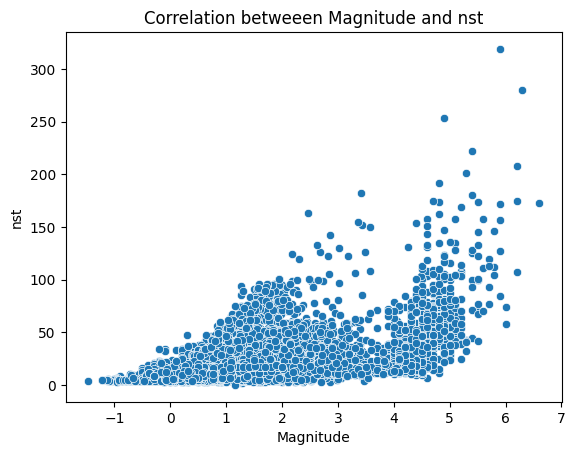

In [50]:
sns.scatterplot(x='mag', y='nst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('nst')
plt.title('Correlation betweeen Magnitude and nst')
plt.show()

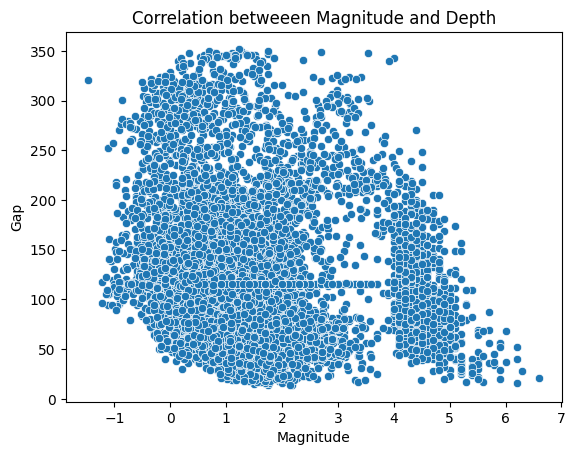

In [51]:
sns.scatterplot(x='mag', y='gap', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Gap')
plt.title('Correlation betweeen Magnitude and Depth')
plt.show()

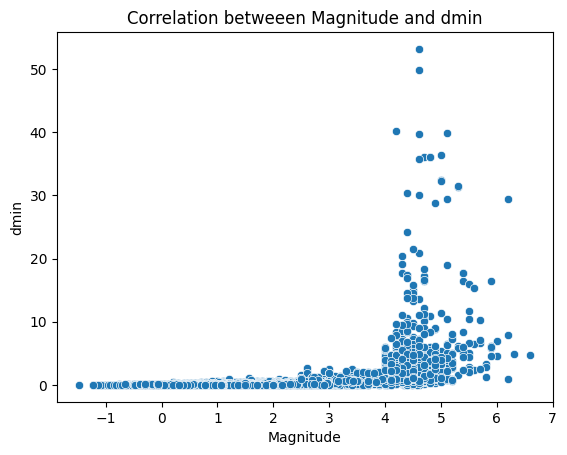

In [52]:
sns.scatterplot(x='mag', y='dmin', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('dmin')
plt.title('Correlation betweeen Magnitude and dmin')
plt.show()

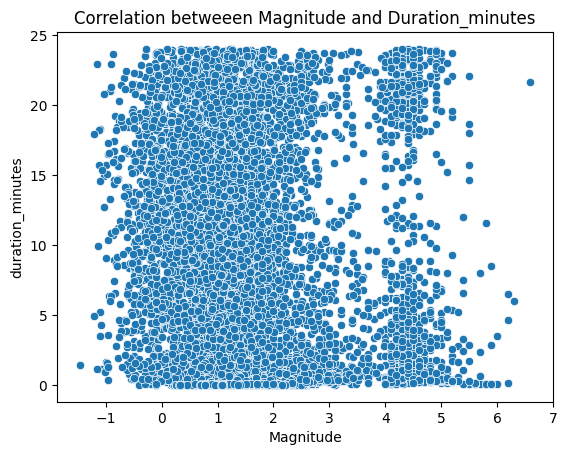

In [53]:
sns.scatterplot(x='mag', y='duration_hours', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('duration_minutes')
plt.title('Correlation betweeen Magnitude and Duration_minutes')
plt.show()

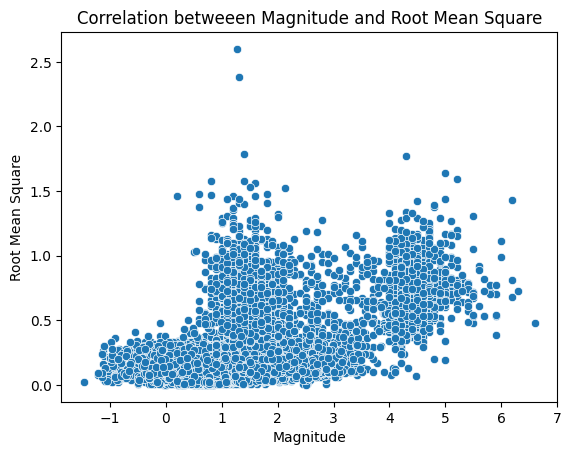

In [54]:
sns.scatterplot(x='mag', y='rms', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Root Mean Square')
plt.title('Correlation betweeen Magnitude and Root Mean Square')
plt.show()

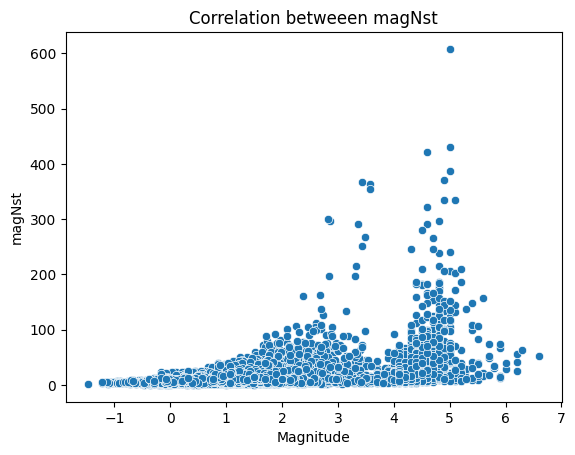

In [55]:
sns.scatterplot(x='mag', y='magNst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magNst')
plt.title('Correlation betweeen magNst')
plt.show()

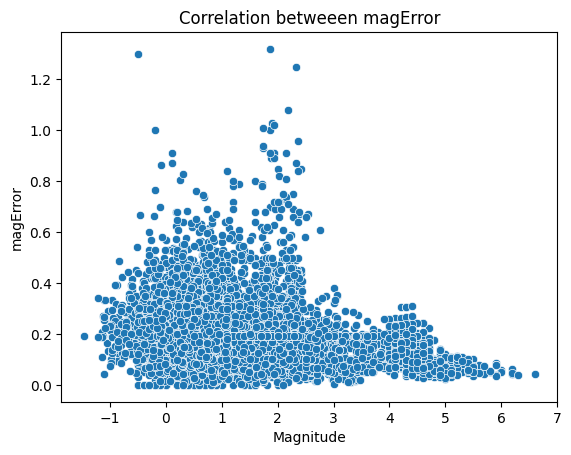

In [56]:
sns.scatterplot(x='mag', y='magError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magError')
plt.title('Correlation betweeen magError')
plt.show()

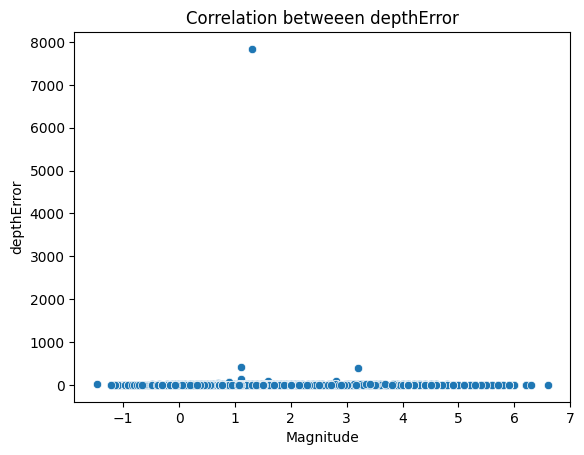

In [57]:
sns.scatterplot(x='mag', y='depthError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('depthError')
plt.title('Correlation betweeen depthError')
plt.show()

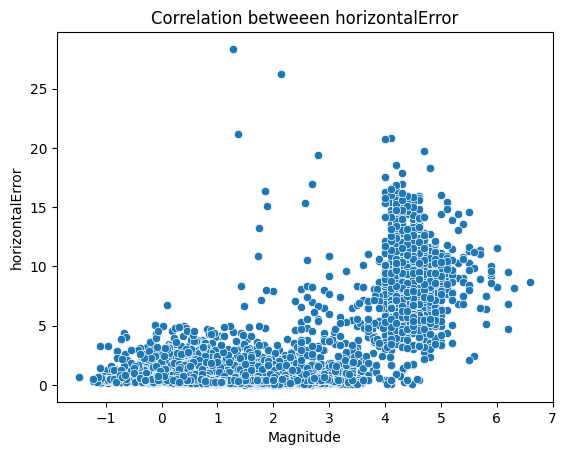

In [58]:
sns.scatterplot(x='mag', y='horizontalError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('horizontalError')
plt.title('Correlation betweeen horizontalError')
plt.show()

In [59]:
import geopandas as gdp
from shapely.geometry import Point

In [60]:
world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world_data

<ipython-input-60-f4309da0851e>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [61]:
#Converting to GeoDataFrame
geometry = [Point(xy) for xy in zip(cleaned_earthquake['longitude'],cleaned_earthquake['latitude'])]
geo_df = gdp.GeoDataFrame(cleaned_earthquake, geometry=geometry)
geo_df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,horizontalError,depthError,magError,magNst,status,updated_date,duration_time,duration_hours,actual_place,geometry
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,...,0.90,1.71,0.205,7.0,automatic,2024-06-23,122,0.033889,CA,POINT (-116.48617 33.41250)
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,...,0.20,0.38,0.180,27.0,automatic,2024-06-23,97,0.026944,CA,POINT (-122.80733 38.83484)
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,...,0.71,1.08,0.170,8.0,automatic,2024-06-23,98,0.027222,CA,POINT (-122.87300 38.84017)
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,...,0.15,0.20,0.250,13.0,automatic,2024-06-23,99,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,...,0.30,0.49,0.270,10.0,automatic,2024-06-23,95,0.026389,CA,POINT (-122.76633 38.77717)


In [62]:
geo_df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'type', 'horizontalError', 'depthError',
       'magError', 'magNst', 'status', 'updated_date', 'duration_time',
       'duration_hours', 'actual_place', 'geometry'],
      dtype='object')

In [63]:
columns_to_drop = ['latitude', 'longitude', 'depth',  'magType', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError',
       'magError', 'magNst', 'status', 'updated_date', 'duration_time' ]
geo_df.drop(columns_to_drop, axis=1, inplace=True)
geo_df.head()

,mag,nst,net,type,duration_hours,actual_place,geometry
0,1.03,19.0,ci,earthquake,0.033889,CA,POINT (-116.48617 33.41250)
1,1.28,27.0,nc,earthquake,0.026944,CA,POINT (-122.80733 38.83484)
2,0.27,8.0,nc,earthquake,0.027222,CA,POINT (-122.87300 38.84017)
3,1.89,18.0,hv,earthquake,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,1.02,9.0,nc,earthquake,0.026389,CA,POINT (-122.76633 38.77717)


In [64]:
columns_to_drop = ['nst']
geo_df.drop(columns_to_drop, axis=1, inplace=True)
geo_df.head()

,mag,net,type,duration_hours,actual_place,geometry
0,1.03,ci,earthquake,0.033889,CA,POINT (-116.48617 33.41250)
1,1.28,nc,earthquake,0.026944,CA,POINT (-122.80733 38.83484)
2,0.27,nc,earthquake,0.027222,CA,POINT (-122.87300 38.84017)
3,1.89,hv,earthquake,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,1.02,nc,earthquake,0.026389,CA,POINT (-122.76633 38.77717)


In [65]:
geo_df.describe()

,mag,duration_hours
count,10037.000000,10037.000000
mean,1.532087,7.002378
std,1.236795,7.745153
min,-1.470000,0.001389
25%,0.760000,0.043889
50%,1.300000,3.732778
75%,1.970000,13.106389
max,6.600000,23.999444


In [66]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   mag             10037 non-null  float64 
 1   net             10037 non-null  object  
 2   type            10037 non-null  object  
 3   duration_hours  10037 non-null  float64 
 4   actual_place    10037 non-null  object  
 5   geometry        10037 non-null  geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 470.6+ KB


<ipython-input-67-5be736b7f19b>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


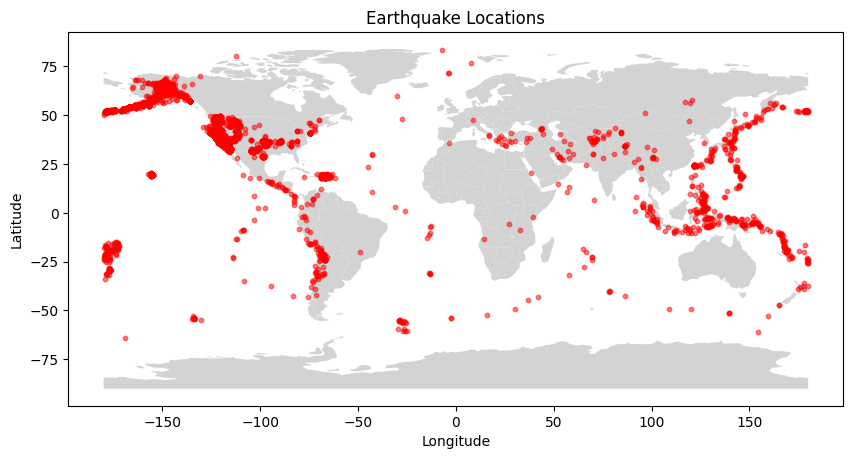

In [67]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

# Plot base map
world.plot(ax=ax, color='lightgray')

#Plot earthquake points
geo_df.plot(ax=ax, markersize=10, color = 'red', alpha=0.5)

# Customize and show the plot
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('global_distribution.png')


plt.show()

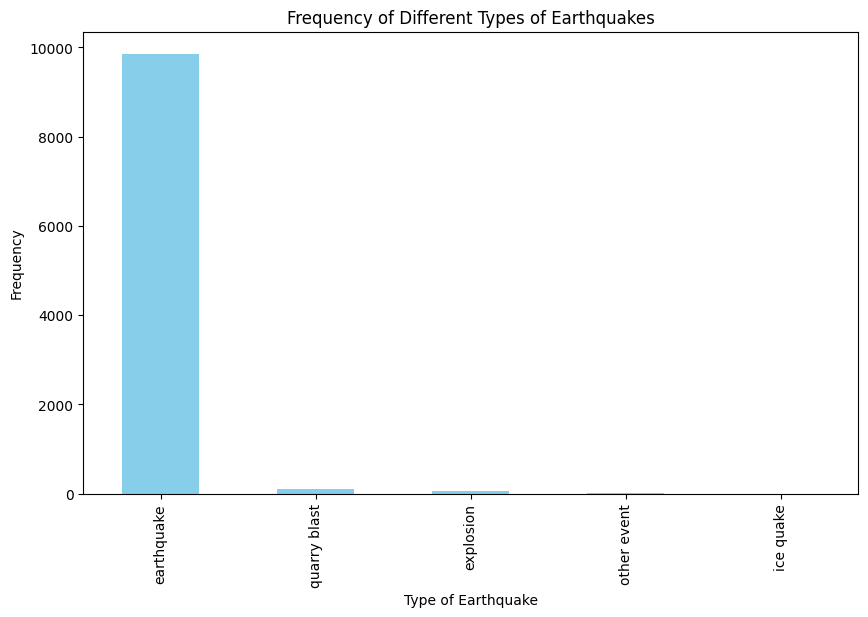

In [68]:
type_counts = geo_df['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Frequency')
plt.xlabel('Type of Earthquake')
plt.title('Frequency of Different Types of Earthquakes')
plt.savefig('earthquakes_types.png')
plt.show()

In [69]:
geo_df['net'].nunique()

15

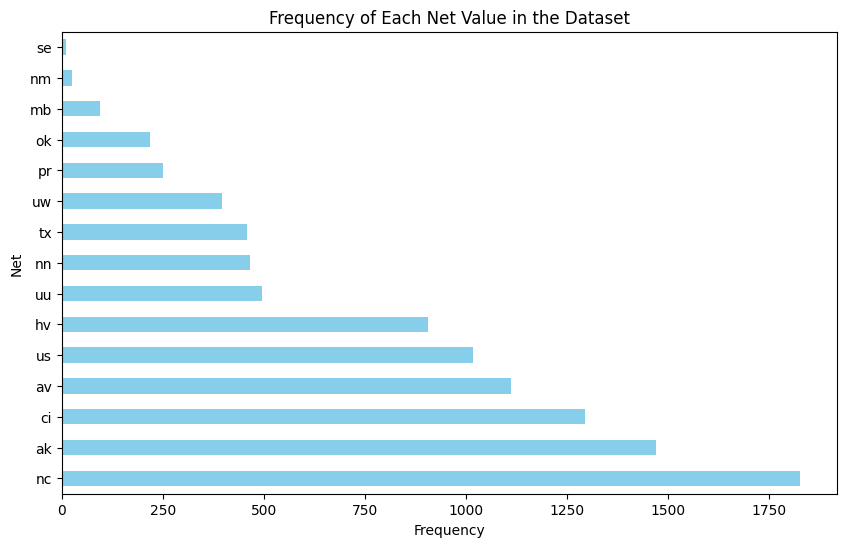

In [70]:
net_counts = geo_df['net'].value_counts()

plt.figure(figsize=(10, 6))
net_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Net')
plt.title('Frequency of Each Net Value in the Dataset')
plt.savefig('Network_rankings.png')
plt.show()

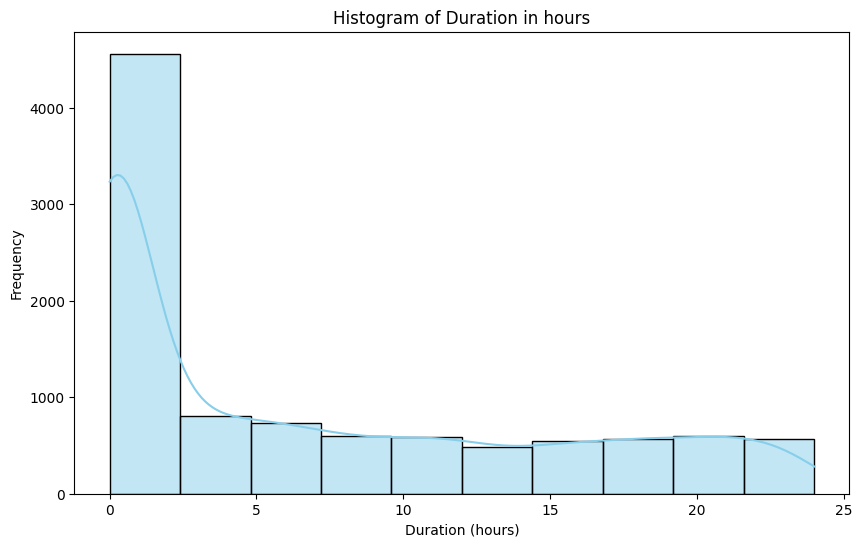

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(geo_df['duration_hours'], kde=True, bins=10, color='skyblue')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration in hours')
plt.savefig('Time_distribution.png')
plt.show()

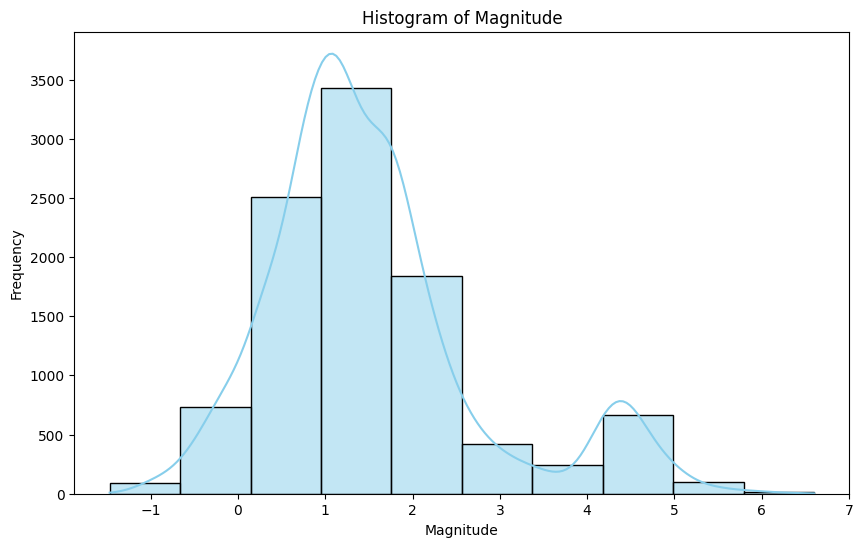

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(geo_df['mag'], kde=True, bins=10, color='skyblue')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')
plt.savefig('magnitude_distribution.png')
plt.show()

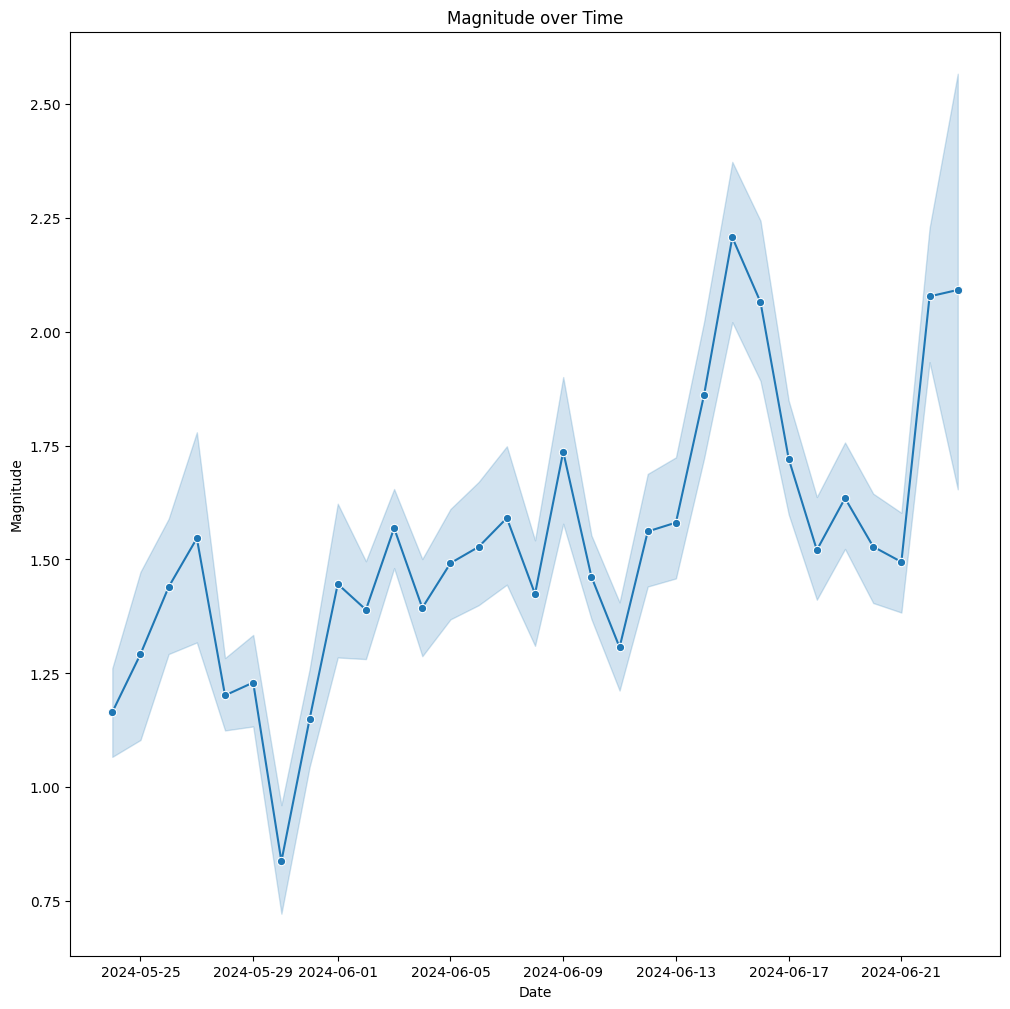

In [73]:
plt.figure(figsize=(12, 12))
sns.lineplot(x='updated_date', y='mag', data=cleaned_earthquake, marker='o')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Magnitude over Time')
plt.show()

**DATA ENCODING**

In [74]:
cleaned_earthquake['mag']

0        1.03
1        1.28
2        0.27
3        1.89
4        1.02
         ... 
10032   -0.66
10033    0.32
10034    1.37
10035    1.50
10036    1.07
Name: mag, Length: 10037, dtype: float64

In [75]:
from sklearn.preprocessing import OneHotEncoder
clean_earthquake_encoded = pd.get_dummies(cleaned_earthquake, columns=['net', 'type', 'magType', 'status'], drop_first=True, sparse=False)
#clean_earthquake_encoded = clean_earthquake_encoded.replace({'automatic':1, 'reviewed':0})
#clean_earthquake_encoded = clean_earthquake_encoded.astype(int)
clean_earthquake_encoded.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,type_quarry blast,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mlr,magType_mw,magType_mwr,magType_mww,status_reviewed
0,33.412498,-116.486168,12.14,1.03,19.0,102.0,0.127000,0.23,0.90,1.71,...,False,False,False,False,True,False,False,False,False,False
1,38.834835,-122.807335,2.21,1.28,27.0,50.0,0.011620,0.02,0.20,0.38,...,False,False,True,False,False,False,False,False,False,False
2,38.840168,-122.873001,1.87,0.27,8.0,97.0,0.003424,0.05,0.71,1.08,...,False,False,True,False,False,False,False,False,False,False
3,19.390333,-155.253326,0.67,1.89,18.0,49.0,0.005162,0.12,0.15,0.20,...,False,False,True,False,False,False,False,False,False,False
4,38.777168,-122.766335,1.11,1.02,9.0,88.0,0.006454,0.02,0.30,0.49,...,False,False,True,False,False,False,False,False,False,False


In [76]:
clean_earthquake_encoded.shape

(10037, 43)

In [77]:
clean_earthquake_encoded.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,type_quarry blast,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mlr,magType_mw,magType_mwr,magType_mww,status_reviewed
0,33.412498,-116.486168,12.14,1.03,19.0,102.0,0.127000,0.23,0.90,1.71,...,False,False,False,False,True,False,False,False,False,False
1,38.834835,-122.807335,2.21,1.28,27.0,50.0,0.011620,0.02,0.20,0.38,...,False,False,True,False,False,False,False,False,False,False
2,38.840168,-122.873001,1.87,0.27,8.0,97.0,0.003424,0.05,0.71,1.08,...,False,False,True,False,False,False,False,False,False,False
3,19.390333,-155.253326,0.67,1.89,18.0,49.0,0.005162,0.12,0.15,0.20,...,False,False,True,False,False,False,False,False,False,False
4,38.777168,-122.766335,1.11,1.02,9.0,88.0,0.006454,0.02,0.30,0.49,...,False,False,True,False,False,False,False,False,False,False


In [78]:
clean_earthquake_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   latitude           10037 non-null  float64       
 1   longitude          10037 non-null  float64       
 2   depth              10037 non-null  float64       
 3   mag                10037 non-null  float64       
 4   nst                10037 non-null  float64       
 5   gap                10037 non-null  float64       
 6   dmin               10037 non-null  float64       
 7   rms                10037 non-null  float64       
 8   horizontalError    10037 non-null  float64       
 9   depthError         10037 non-null  float64       
 10  magError           10037 non-null  float64       
 11  magNst             10037 non-null  float64       
 12  updated_date       10037 non-null  datetime64[ns]
 13  duration_time      10037 non-null  int64         
 14  durati

**Splitting the dataset**

In [80]:
X = clean_earthquake_encoded.drop(axis=1, columns=['actual_place', 'updated_date', 'duration_hours', 'mag'])
y = clean_earthquake_encoded['mag']

**Linear Regression**

In [81]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

reg = make_pipeline( PolynomialFeatures(degree=1), StandardScaler(), LinearRegression())
scores = cross_val_score(reg, X, y, cv=10, scoring='r2')
print(scores)
print(scores.mean())


[0.80474717 0.79095684 0.82087363 0.84721704 0.8111356  0.85330139
 0.82895057 0.0066997  0.7543345  0.85996143]
0.7378177870263958


**Ridge**

In [82]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), Ridge(alpha = 100.0))
scores = cross_val_score(ridge, X, y, cv=20, scoring='neg_mean_absolute_error').mean()*-1
print(scores)
print(scores.mean())

0.3896561856988539
0.3896561856988539


In [83]:
from sklearn.linear_model import Lasso

lasso = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), Lasso(alpha = 0.9))
scores = cross_val_score(ridge, X, y, cv=20, scoring='neg_mean_absolute_error').mean()*-1
print(scores)
print(scores.mean())

0.3896561856988539
0.3896561856988539


In [84]:
from sklearn.linear_model import ElasticNet

elastic_net = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), ElasticNet(alpha = 1.0, l1_ratio=0.00001))
scores = cross_val_score(elastic_net, X, y, cv=5, scoring='neg_mean_absolute_error').mean()*-1
print(scores)


0.4826544294619877


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
g_reg = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 5, learning_rate= 0.01, random_state=0)
scores = cross_val_score(g_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

0.30611055941368365


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
     "n_estimators": [500, 750, 1000],
    "max_depth": [2, 4, 6],
    "min_samples_split": [2,5],
    "learning_rate": [0.01, 0.1]}

grid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score * -1)

In [ ]:
from sklearn.ensemble import BaggingRegressor
b_reg = BaggingRegressor(random_state=0)
scores = cross_val_score(b_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'estimator' : [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()],
    'n_estimators': [5, 10, 20],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

random_search = RandomizedSearchCV(BaggingRegressor(), param_distributions=param_grid, cv=5, scoring='neg_mean_absolute_error')
random_search.fit(X, y)
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print(best_score * -1)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=0))
]

s_reg = StackingRegressor(estimators = estimators)
scores = cross_val_score(s_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

estimators = [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=0))]

random_search = RandomizedSearchCV(StackingRegressor(estimators = estimators,  final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)), cv=5, scoring='neg_mean_absolute_error')
random_search.fit(X, y)
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print(best_score)
print(best_score * -1)
'''

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import wkt

# Create a sample dataframe based on the provided data
data = {
    'mag': [1.03, 1.28, 0.27, 1.89, 1.02],
    'net': ['ci', 'nc', 'nc', 'hv', 'nc'],
    'type': ['earthquake', 'earthquake', 'earthquake', 'earthquake', 'earthquake'],
    'duration_minutes': [2.033333, 1.616667, 1.633333, 1.65, 1.583333],
    'actual_place': ['CA', 'CA', 'CA', 'Hawaii', 'CA'],
    'geometry': [
        'POINT (-116.48617 33.41250)',
        'POINT (-122.80733 38.83484)',
        'POINT (-122.87300 38.84017)',
        'POINT (-155.25333 19.39033)',
        'POINT (-122.76633 38.77717)'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert the 'geometry' column to GeoSeries
df['geometry'] = df['geometry'].apply(wkt.loads)

# Convert DataFrame to GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot base map
world.plot(ax=ax, color='lightgray')

# Plot earthquake points with color based on magnitude
sc = geo_df.plot(ax=ax, column='mag', markersize=50, cmap='Reds', alpha=0.6, legend=True, legend_kwds={'label': "Magnitude"})

# Annotate the net values
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.net):
    ax.text(x, y, label, fontsize=8, ha='right', color='black')

# Customize and show the plot
plt.title('Earthquake Locations with Network Labels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot
plt.savefig('global_distribution_of_earthquake_locations_with_labels.png')

plt.show()
